# <center>Final Project</center>
###### Yu-Shin Huang / Tsung-Cheng Chen
---

## Topic : Adult >50k a year classification

### Read data

In [2]:
import pandas as pd

df = pd.read_csv("adult.data",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                                      'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

df.head()
 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df = pd.read_csv("adult.data",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                                      'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])
workclass_mapping={" Private": 0,
                " Self-emp-not-inc": 1,
                " Self-emp-inc": 2,
                " Federal-gov": 3,
                " Local-gov":4,
                " State-gov":5,
                " Without-pay":6,
                " Never-worked":7}

education_mapping={" Preschool":0,
                   " 1st-4th":1,
                   " 5th-6th":2,
                   " 7th-8th":3,
                   " 9th":4,
                   " 10th":5,
                   " 11th":6,
                   " 12th":7,
                   " HS-grad":8,
                   " Some-college":9,
                   " Prof-school":10,
                   " Assoc-acdm":11,
                   " Assoc-voc":12,
                   " Bachelors":13,
                   " Masters":14,
                   " Doctorate":15 }

marital_mapping={" Never-married":0,
                 " Separated":1,
                 " Divorced":2,
                 " Widowed":3,
                 " Married-spouse-absent":4,
                 " Married-AF-spouse":5,
                 " Married-civ-spouse":6 }

occupation_mapping={" Tech-support":0,
                    " Craft-repair":1,
                    " Other-service":2,
                    " Sales":3,
                    " Exec-managerial":4,
                    " Prof-specialty":5,
                    " Handlers-cleaners":6,
                    " Machine-op-inspct":7,
                    " Adm-clerical":8,
                    " Farming-fishing":9,
                    " Transport-moving":10,
                    " Priv-house-serv":11,
                    " Protective-serv":12,
                    " Armed-Forces":13 }

relationship_mapping={" Wife":0,
                      " Husband":1,
                      " Own-child":2,
                      " Other-relative":3,
                      " Not-in-family":4,
                      " Unmarried":5 }

race_mapping={" White":0,
              " Asian-Pac-Islander":1,
              " Amer-Indian-Eskimo":2,
              " Other":3,
              " Black":4 }

sex_mapping={" Female":0,
             " Male":1 }

native_mapping={" United-States":0,
                " Cambodia":1,
                " England":2,
                " Puerto-Rico":3,
                " Canada":4,
                " Germany":5,
                " Outlying-US(Guam-USVI-etc)":6,
                " India":7,
                " Japan":8,
                " Greece":9,
                " South":10,
                " China":11,
                " Cuba":12,
                " Iran":13,
                " Honduras":14,
                " Philippines":15,
                " Italy":16,
                " Poland":17,
                " Jamaica":19,
                " Vietnam":20,
                " Mexico":21,
                " Portugal":22,
                " Ireland":23,
                " France":24,
                " Dominican-Republic":25,
                " Laos":26,
                " Ecuador":27,
                " Taiwan":28,
                " Haitiv":29,
                " Columbia":30,
                " Hungary":31,
                " Guatemala":32,
                " Nicaragua":33,
                " Scotland":34,
                " Thailand":35,
                " Yugoslavia":36,
                " El-Salvador":37,
                " Trinadad&Tobago":38,
                " Peru":39,
                " Hong":40,
                " Holand-Netherlands":41 }

class_mapping={" >50K": 1,
               " <=50K": 0}
               
df['workclass'] = df['workclass'].map(workclass_mapping)
df['education'] = df['education'].map(education_mapping)
df['marital-status'] = df['marital-status'].map(marital_mapping)
df['occupation'] = df['occupation'].map(occupation_mapping)
df['relationship'] = df['relationship'].map(relationship_mapping)
df['race'] = df['race'].map(race_mapping)
df['sex'] = df['sex'].map(sex_mapping)
df['native-country'] = df['native-country'].map(native_mapping)
df['class'] = df['class'].map(class_mapping)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,5.0,77516,13,13,0,8.0,4,0,1,2174,0,40,0.0,0
1,50,1.0,83311,13,13,6,4.0,1,0,1,0,0,13,0.0,0
2,38,0.0,215646,8,9,2,6.0,4,0,1,0,0,40,0.0,0
3,53,0.0,234721,6,7,6,6.0,1,4,1,0,0,40,0.0,0
4,28,0.0,338409,13,13,6,5.0,0,4,0,0,0,40,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.0,257302,11,12,6,0.0,0,0,0,0,0,38,0.0,0
32557,40,0.0,154374,8,9,6,7.0,1,0,1,0,0,40,0.0,1
32558,58,0.0,151910,8,9,3,8.0,5,0,0,0,0,40,0.0,0
32559,22,0.0,201490,8,9,0,8.0,2,0,1,0,0,20,0.0,0


In [4]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     627
class                0
dtype: int64

In [5]:
df1=df.dropna(axis=0)
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,5.0,77516,13,13,0,8.0,4,0,1,2174,0,40,0.0,0
1,50,1.0,83311,13,13,6,4.0,1,0,1,0,0,13,0.0,0
2,38,0.0,215646,8,9,2,6.0,4,0,1,0,0,40,0.0,0
3,53,0.0,234721,6,7,6,6.0,1,4,1,0,0,40,0.0,0
4,28,0.0,338409,13,13,6,5.0,0,4,0,0,0,40,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.0,257302,11,12,6,0.0,0,0,0,0,0,38,0.0,0
32557,40,0.0,154374,8,9,6,7.0,1,0,1,0,0,40,0.0,1
32558,58,0.0,151910,8,9,3,8.0,5,0,0,0,0,40,0.0,0
32559,22,0.0,201490,8,9,0,8.0,2,0,1,0,0,20,0.0,0


In [6]:
import numpy as np

X0=df.iloc[:,:13].values
y0=df.iloc[:,14].values
print(np.bincount(y0))

X_train=df1.iloc[:,:13].values
y_train=df1.iloc[:,14].values
print(np.bincount(y_train))

[24720  7841]
[22616  7504]


In [7]:
df2 = pd.read_csv("adult.test",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                                      'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [8]:
df2 = pd.read_csv("adult.test",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                                      'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])
workclass_mapping={" Private": 0,
                " Self-emp-not-inc": 1,
                " Self-emp-inc": 2,
                " Federal-gov": 3,
                " Local-gov":4,
                " State-gov":5,
                " Without-pay":6,
                " Never-worked":7}

education_mapping={" Preschool":0,
                   " 1st-4th":1,
                   " 5th-6th":2,
                   " 7th-8th":3,
                   " 9th":4,
                   " 10th":5,
                   " 11th":6,
                   " 12th":7,
                   " HS-grad":8,
                   " Some-college":9,
                   " Prof-school":10,
                   " Assoc-acdm":11,
                   " Assoc-voc":12,
                   " Bachelors":13,
                   " Masters":14,
                   " Doctorate":15 }

marital_mapping={" Never-married":0,
                 " Separated":1,
                 " Divorced":2,
                 " Widowed":3,
                 " Married-spouse-absent":4,
                 " Married-AF-spouse":5,
                 " Married-civ-spouse":6 }

occupation_mapping={" Tech-support":0,
                    " Craft-repair":1,
                    " Other-service":2,
                    " Sales":3,
                    " Exec-managerial":4,
                    " Prof-specialty":5,
                    " Handlers-cleaners":6,
                    " Machine-op-inspct":7,
                    " Adm-clerical":8,
                    " Farming-fishing":9,
                    " Transport-moving":10,
                    " Priv-house-serv":11,
                    " Protective-serv":12,
                    " Armed-Forces":13 }

relationship_mapping={" Wife":0,
                      " Husband":1,
                      " Own-child":2,
                      " Other-relative":3,
                      " Not-in-family":4,
                      " Unmarried":5 }

race_mapping={" White":0,
              " Asian-Pac-Islander":1,
              " Amer-Indian-Eskimo":2,
              " Other":3,
              " Black":4 }

sex_mapping={" Female":0,
             " Male":1 }

native_mapping={" United-States":0,
                " Cambodia":1,
                " England":2,
                " Puerto-Rico":3,
                " Canada":4,
                " Germany":5,
                " Outlying-US(Guam-USVI-etc)":6,
                " India":7,
                " Japan":8,
                " Greece":9,
                " South":10,
                " China":11,
                " Cuba":12,
                " Iran":13,
                " Honduras":14,
                " Philippines":15,
                " Italy":16,
                " Poland":17,
                " Jamaica":19,
                " Vietnam":20,
                " Mexico":21,
                " Portugal":22,
                " Ireland":23,
                " France":24,
                " Dominican-Republic":25,
                " Laos":26,
                " Ecuador":27,
                " Taiwan":28,
                " Haitiv":29,
                " Columbia":30,
                " Hungary":31,
                " Guatemala":32,
                " Nicaragua":33,
                " Scotland":34,
                " Thailand":35,
                " Yugoslavia":36,
                " El-Salvador":37,
                " Trinadad&Tobago":38,
                " Peru":39,
                " Hong":40,
                " Holand-Netherlands":41 }

class_mapping={" >50K.":1,
               " <=50K.":0}
               
df2['workclass'] = df2['workclass'].map(workclass_mapping)
df2['education'] = df2['education'].map(education_mapping)
df2['marital-status'] = df2['marital-status'].map(marital_mapping)
df2['occupation'] = df2['occupation'].map(occupation_mapping)
df2['relationship'] = df2['relationship'].map(relationship_mapping)
df2['race'] = df2['race'].map(race_mapping)
df2['sex'] = df2['sex'].map(sex_mapping)
df2['native-country'] = df2['native-country'].map(native_mapping)
df2['class'] = df2['class'].map(class_mapping)
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,0.0,226802.0,6.0,7.0,0.0,7.0,2.0,4.0,1.0,0.0,0.0,40.0,0.0,0.0
2,38,0.0,89814.0,8.0,9.0,6.0,9.0,1.0,0.0,1.0,0.0,0.0,50.0,0.0,0.0
3,28,4.0,336951.0,11.0,12.0,6.0,12.0,1.0,0.0,1.0,0.0,0.0,40.0,0.0,1.0
4,44,0.0,160323.0,9.0,10.0,6.0,7.0,1.0,4.0,1.0,7688.0,0.0,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,0.0,215419.0,13.0,13.0,2.0,5.0,4.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0
16278,64,NaN,321403.0,8.0,9.0,3.0,NaN,3.0,4.0,1.0,0.0,0.0,40.0,0.0,0.0
16279,38,0.0,374983.0,13.0,13.0,6.0,5.0,1.0,0.0,1.0,0.0,0.0,50.0,0.0,0.0
16280,44,0.0,83891.0,13.0,13.0,2.0,8.0,2.0,1.0,1.0,5455.0,0.0,40.0,0.0,0.0


In [9]:
df2.isnull().sum()

age                 0
workclass         964
fnlwgt              1
education           1
education-num       1
marital-status      1
occupation        967
relationship        1
race                1
sex                 1
capital-gain        1
capital-loss        1
hours-per-week      1
native-country    306
class               1
dtype: int64

In [10]:
import numpy as np
df_test=df2.dropna(axis=0)

X_test=df_test.iloc[:,:13].values
y_test=df_test.iloc[:,14].values

### Use All features

#### Use Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=1, random_state=1, solver='lbfgs', multi_class='ovr') #一開始c先隨便設
lr.fit(X_train_std, y_train)

#做完model，看看成效如何
#測試準確度
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

y_pred = lr.predict(X_test_std) #用test data套入model的值
#有幾個data出問題
print('there are %d error in testing data' % (y_test != y_pred).sum())

Training accuracy: 0.8393426294820717
Test accuracy: 0.8380230160313976
there are 2435 error in testing data


lr c= 0.00001 的training accuracy : 0.751
lr c= 0.00001 的test accuracy : 0.754
there are 3695 error in testing data 

lr c= 0.00010 的training accuracy : 0.788
lr c= 0.00010 的test accuracy : 0.791
there are 3140 error in testing data 

lr c= 0.00100 的training accuracy : 0.831
lr c= 0.00100 的test accuracy : 0.829
there are 2566 error in testing data 

lr c= 0.01000 的training accuracy : 0.839
lr c= 0.01000 的test accuracy : 0.838
there are 2439 error in testing data 

lr c= 0.10000 的training accuracy : 0.839
lr c= 0.10000 的test accuracy : 0.838
there are 2432 error in testing data 

lr c= 1.00000 的training accuracy : 0.839
lr c= 1.00000 的test accuracy : 0.838
there are 2435 error in testing data 

lr c= 10.00000 的training accuracy : 0.839
lr c= 10.00000 的test accuracy : 0.838
there are 2436 error in testing data 

lr c= 100.00000 的training accuracy : 0.839
lr c= 100.00000 的test accuracy : 0.838
there are 2436 error in testing data 

lr c= 1000.00000 的training accuracy : 0.839
lr c= 1000.000

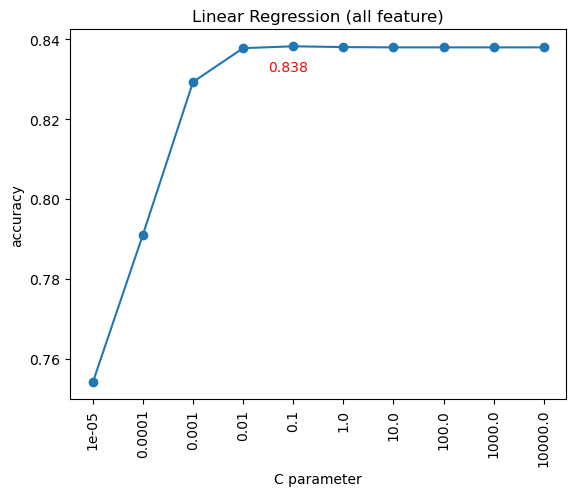

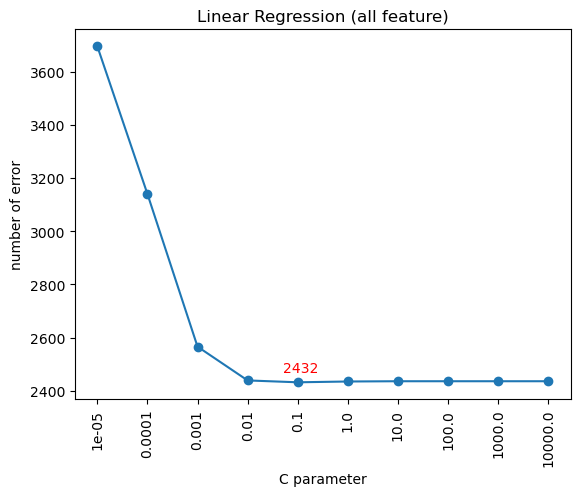

In [12]:
import matplotlib.pyplot as plt

C = [0]
Sc = [0]
EN = [0]

for i in range(-5,5):
    lr_try = LogisticRegression(C=1*((10)**i), random_state=1, solver='lbfgs', multi_class='ovr')
    lr_try.fit(X_train_std, y_train)
    
    #測試準確度
    y_pred_try = lr_try.predict(X_test_std) #用test data套入model的值
    print('lr c= %.5f 的training accuracy : %.3f' %(1*(10**i) , lr_try.score(X_train_std, y_train)))
    print('lr c= %.5f 的test accuracy : %.3f' %(1*(10**i) , lr_try.score(X_test_std, y_test)))
    
    #有幾個data出問題
    errN = int((y_test != y_pred_try).sum())
    print('there are %d error in testing data' % (y_test != y_pred_try).sum(),'\n')
    
    C = np.append(C,1*((10)**i))
    Sc = np.append(Sc,lr_try.score(X_test_std, y_test))
    EN = np.append(EN, errN)

C = C[1:]
Xtick = np.arange(len(C))
Sc = Sc[1:]
EN = EN[1:]

plt.plot(Xtick,Sc,'o-')
plt.xticks(Xtick, C, rotation='vertical')
plt.annotate(0.838,(3.5,0.832),color = 'red')
plt.xlabel('C parameter')
plt.ylabel('accuracy')
plt.title('Linear Regression (all feature)')
plt.savefig('LR_score_all.png')
plt.show()

plt.plot(Xtick,EN,'o-')
plt.xticks(Xtick, C, rotation='vertical')
plt.annotate(2432,(3.7,2470),color = 'red')
plt.xlabel('C parameter')
plt.ylabel('number of error')
plt.title('Linear Regression (all feature)')
plt.savefig('LR_EN_all.png')
plt.show()

In [13]:
import pandas as pd
df = np.vstack((Sc,EN))
#print(df)
LR_alldf = pd.DataFrame(df,columns=['0.00001','0.0001','0.001','0.01','0.1','1','10','100','1000','10000'],index=['Score',"# of error"])
LR_alldf.add_prefix('C=')

,C=0.00001,C=0.0001,C=0.001,C=0.01,C=0.1,C=1,C=10,C=100,C=1000,C=10000
Score,0.754207,0.791126,0.829309,0.837757,0.838223,0.838023,0.837956,0.837956,0.837956,0.837956
# of error,3695.000000,3140.000000,2566.000000,2439.000000,2432.000000,2435.000000,2436.000000,2436.000000,2436.000000,2436.000000


#### Use Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(criterion='gini',n_estimators=25, random_state=1,n_jobs=2) #n先隨便取
forest.fit(X_train_std, y_train)


y_pred = forest.predict(X_test_std) 

print('forest gini accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('there are %d error in testing data' % (y_test != y_pred).sum(),'\n')

forest gini accuracy: 0.848
there are 2287 error in testing data 



In [166]:
n_es = [0]
Sc = [0]
EN = [0]

for i in range(100):
    forest_try = RandomForestClassifier(criterion='gini',n_estimators=10+10*i, random_state=1,n_jobs=2) #n先隨便取
    forest_try.fit(X_train_std, y_train)

    
    y_pred_train = forest_try.predict(X_train_std)
    y_pred_try = forest_try.predict(X_test_std) 
    
    print('forest gini n=%d training accuracy: %.3f' %(10+10*i, accuracy_score(y_train, y_pred_train)))
    print('forest gini n=%d testing accuracy: %.3f' %(10+10*i, accuracy_score(y_test, y_pred_try)))
    print('there are %d error number of classification' % (y_test != y_pred_try).sum(),'\n')
    
    n_es = np.append(n_es,10+10*i)
    Sc = np.append(Sc, accuracy_score(y_test, y_pred_try))
    EN = np.append(EN, (y_test != y_pred_try).sum())

    
n_es = n_es[1:]
Xtick = np.arange(len(n_es))
Sc = Sc[1:]
EN = EN[1:]

forest gini n=10 training accuracy: 0.988
forest gini n=10 testing accuracy: 0.844
there are 2349 error number of classification 

forest gini n=20 training accuracy: 0.996
forest gini n=20 testing accuracy: 0.848
there are 2283 error number of classification 

forest gini n=30 training accuracy: 0.999
forest gini n=30 testing accuracy: 0.848
there are 2281 error number of classification 

forest gini n=40 training accuracy: 0.999
forest gini n=40 testing accuracy: 0.848
there are 2282 error number of classification 

forest gini n=50 training accuracy: 1.000
forest gini n=50 testing accuracy: 0.850
there are 2260 error number of classification 

forest gini n=60 training accuracy: 1.000
forest gini n=60 testing accuracy: 0.849
there are 2271 error number of classification 

forest gini n=70 training accuracy: 1.000
forest gini n=70 testing accuracy: 0.850
there are 2258 error number of classification 

forest gini n=80 training accuracy: 1.000
forest gini n=80 testing accuracy: 0.848


forest gini n=630 training accuracy: 1.000
forest gini n=630 testing accuracy: 0.851
there are 2239 error number of classification 

forest gini n=640 training accuracy: 1.000
forest gini n=640 testing accuracy: 0.851
there are 2239 error number of classification 

forest gini n=650 training accuracy: 1.000
forest gini n=650 testing accuracy: 0.851
there are 2237 error number of classification 

forest gini n=660 training accuracy: 1.000
forest gini n=660 testing accuracy: 0.851
there are 2233 error number of classification 

forest gini n=670 training accuracy: 1.000
forest gini n=670 testing accuracy: 0.851
there are 2238 error number of classification 

forest gini n=680 training accuracy: 1.000
forest gini n=680 testing accuracy: 0.851
there are 2242 error number of classification 

forest gini n=690 training accuracy: 1.000
forest gini n=690 testing accuracy: 0.851
there are 2246 error number of classification 

forest gini n=700 training accuracy: 1.000
forest gini n=700 testing 

0.851460121066986


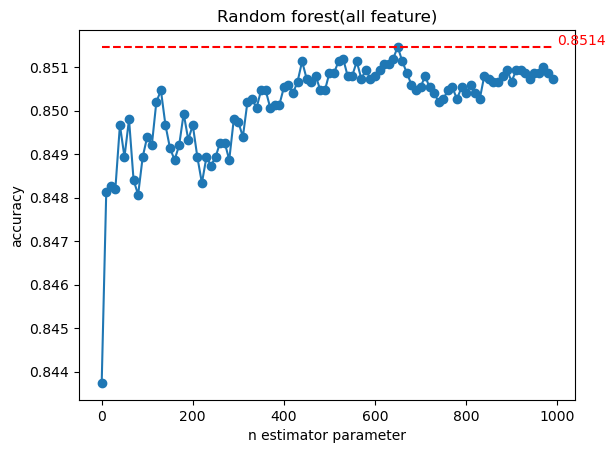

2233


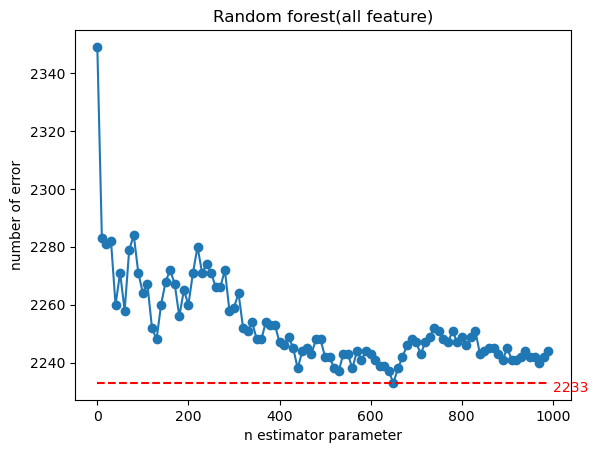

In [168]:
RF_allSC = Sc
RF_allEN = EN

print(max(Sc))
M = max(Sc)*np.ones(len(Sc))
plt.plot(Xtick*10,Sc,'o-')
plt.plot(Xtick*10,M,'--',color = 'red')
#plt.xticks(Xtick, n_es, rotation='vertical')
plt.annotate(0.8514,(1000,0.8515),color='red')
plt.xlabel('n estimator parameter')
plt.ylabel('accuracy')
plt.title('Random forest(all feature)')
plt.savefig('RF_score_all.png')
plt.show()

print(min(EN))
m = min(EN)*np.ones(len(EN))
plt.plot(Xtick*10,EN,'o-')
plt.plot(Xtick*10,m,'--',color = 'red')
#plt.xticks(Xtick, n_es, rotation='vertical')
plt.annotate(2233,(1000,2230),color='red')
plt.xlabel('n estimator parameter')
plt.ylabel('number of error')
plt.title('Random forest(all feature)')
plt.savefig('RF_EN_all.png')
plt.show()

In [275]:
df = np.vstack((RF_allSC,RF_allEN))
RF_alldf = pd.DataFrame(df,columns=n_es,index=['Score',"# of error"])
RF_alldf.add_prefix('n=')
RF_alldf.head()

,10,20,30,40,50,60,70,80,90,100,...,910,920,930,940,950,960,970,980,990,1000
Score,0.843744,0.848134,0.848267,0.848201,0.849664,0.848932,0.849797,0.8484,0.848068,0.848932,...,0.850662,0.850928,0.850928,0.850861,0.850728,0.850861,0.850861,0.850994,0.850861,0.850728
# of error,2349.000000,2283.000000,2281.000000,2282.000000,2260.000000,2271.000000,2258.000000,2279.0000,2284.000000,2271.000000,...,2245.000000,2241.000000,2241.000000,2242.000000,2244.000000,2242.000000,2242.000000,2240.000000,2242.000000,2244.000000


#### Use Kernal SVM

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#開始training
svm_rbf = SVC(kernel='rbf', C=10.0, random_state=1,gamma=0.1) 
svm_rbf.fit(X_train_std, y_train)


print('Training accuracy of svm:', svm_rbf.score(X_train_std, y_train))
print('Test accuracy of svm :', svm_rbf.score(X_test_std, y_test))

y_pred = svm_rbf.predict(X_test_std)
print('there are %d error in testing data' % (y_test != y_pred).sum())

Training accuracy of svm: 0.8677954847277557
Test accuracy of svm : 0.8443424466174416
there are 2340 error in testing data


In [52]:
n = 6
C = np.zeros((n,n))
G = np.zeros((n,n))
Sc = np.zeros((n,n))
EN = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        
        #開始training
        svm_rbf = SVC(kernel='rbf', C=0.001*(10**i), random_state=1,gamma=0.001*(10**j)) 
        svm_rbf.fit(X_train_std, y_train)

        
        print('Training accuracy of svm c=%f,gamma=%f: %.3f' %(0.001*(10**i),0.001*(10**j),svm_rbf.score(X_train_std, y_train)))
        print('Test accuracy of svm c=%f,gamma=%f: %.3f' %(0.001*(10**i),0.001*(10**j),svm_rbf.score(X_test_std, y_test)))

        y_pred = svm_rbf.predict(X_test_std) 
        print('有%d個 testing data出問題' % (y_test != y_pred).sum())
        
        C[i,j] = 0.001*(10**i)
        G[i,j] = 0.001*(10**j)
        Sc[i,j] = svm_rbf.score(X_test_std, y_test)
        EN[i,j] = (y_test != y_pred).sum()

print(Sc)
print(EN)

Training accuracy of svm c=0.001000,gamma=0.001000: 0.751
Test accuracy of svm c=0.001000,gamma=0.001000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=0.010000: 0.751
Test accuracy of svm c=0.001000,gamma=0.010000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=0.100000: 0.751
Test accuracy of svm c=0.001000,gamma=0.100000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=1.000000: 0.751
Test accuracy of svm c=0.001000,gamma=1.000000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=10.000000: 0.751
Test accuracy of svm c=0.001000,gamma=10.000000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=100.000000: 0.751
Test accuracy of svm c=0.001000,gamma=100.000000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.010000,gamma=0.001000: 0.753
Test accuracy of svm c=0.010000,gamma=0.001000: 0.757
有3654個 testing data出問題
Training accuracy of svm c=0.010000,gamma=0.01000

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
[[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]]


/var/folders/3n/ftvyv_w15vb7271s7vtyqpfh0000gq/T/ipykernel_24138/3772374846.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,0.001,0.01,0.1,1,10,100])
/var/folders/3n/ftvyv_w15vb7271s7vtyqpfh0000gq/T/ipykernel_24138/3772374846.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0.001,0.01,0.1,1,10,100])


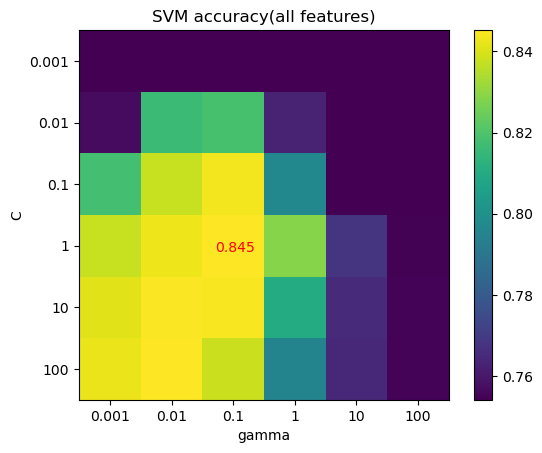

/var/folders/3n/ftvyv_w15vb7271s7vtyqpfh0000gq/T/ipykernel_24138/3772374846.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,0.001,0.01,0.1,1,10,100])
/var/folders/3n/ftvyv_w15vb7271s7vtyqpfh0000gq/T/ipykernel_24138/3772374846.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0.001,0.01,0.1,1,10,100])


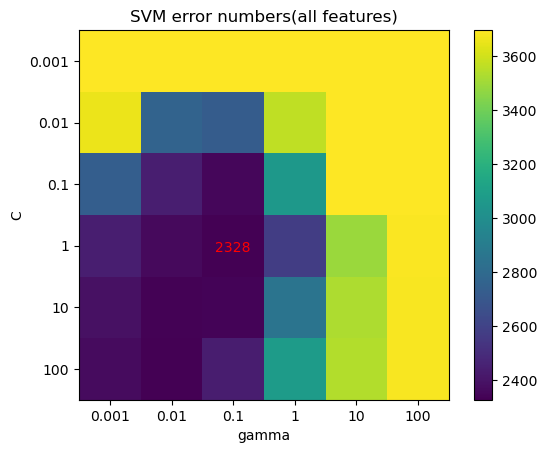

In [277]:
Sc = [[0.75420741, 0.75420741, 0.75420741 ,0.75420741, 0.75420741, 0.75420741],
 [0.75693474, 0.81640391, 0.81873212 ,0.76285505, 0.75420741, 0.75420741],
 [0.81793388, 0.83762389, 0.84361072, 0.79678042, 0.75420741, 0.75420741],
 [0.83749085 ,0.84281248 ,0.84514069, 0.82884321, 0.76777756 ,0.75487261],
 [0.84108295, 0.84474157, 0.84434245 ,0.810151 ,  0.76544934, 0.75493913],
 [0.8425464,  0.84520721, 0.8379565,  0.79511741, 0.76485066 ,0.75520522]]
EN = [[3695., 3695., 3695. ,3695., 3695., 3695.],
 [3654. ,2760. ,2725., 3565. ,3695. ,3695.],
 [2737., 2441., 2351., 3055. ,3695. ,3695.],
 [2443., 2363., 2328., 2573., 3491., 3685.],
 [2389., 2334., 2340. ,2854., 3526., 3684.],
 [2367. ,2327., 2436., 3080., 3535., 3680.]]
print(C)
print(G)
fig, ax = plt.subplots(1,1)
scplot = ax.imshow(Sc)
ax.set_xticklabels([0,0.001,0.01,0.1,1,10,100])
ax.set_yticklabels([0,0.001,0.01,0.1,1,10,100])
ax.text(1.7,3.1,0.845,color ="red")
ax.set_title('SVM accuracy(all features)')
ax.set_xlabel('gamma')
ax.set_ylabel('C')
plt.colorbar(scplot)
plt.savefig('SVM_SC_all.png')
plt.show()

fig, ax = plt.subplots(1,1)
scplot = ax.imshow(EN)
ax.set_xticklabels([0,0.001,0.01,0.1,1,10,100])
ax.set_yticklabels([0,0.001,0.01,0.1,1,10,100])
ax.text(1.7,3.1,2328,color ="red")
ax.set_title('SVM error numbers(all features)')
ax.set_xlabel('gamma')
ax.set_ylabel('C')
plt.colorbar(scplot)
plt.savefig('SVM_EN_all.png')
plt.show()

In [278]:
SVMallscdf = pd.DataFrame(Sc,columns=['0.001','0.01','0.1','1','10','100'],index=['c=0.001','c=0.01','c=0.1','c=1','c=10','c=100'])
SVMallscdf.add_prefix('g = ')

,g = 0.001,g = 0.01,g = 0.1,g = 1,g = 10,g = 100
c=0.001,0.754207,0.754207,0.754207,0.754207,0.754207,0.754207
c=0.01,0.756935,0.816404,0.818732,0.762855,0.754207,0.754207
c=0.1,0.817934,0.837624,0.843611,0.796780,0.754207,0.754207
c=1,0.837491,0.842812,0.845141,0.828843,0.767778,0.754873
c=10,0.841083,0.844742,0.844342,0.810151,0.765449,0.754939
c=100,0.842546,0.845207,0.837956,0.795117,0.764851,0.755205


In [264]:
SVMallendf = pd.DataFrame(EN,columns=['0.001','0.01','0.1','1','10','100'],index=['c=0.001','c=0.01','c=0.1','c=1','c=10','c=100'])
SVMallendf.add_prefix('g = ')

,g = 0.001,g = 0.01,g = 0.1,g = 1,g = 10,g = 100
c=0.001,3695.0,3695.0,3695.0,3695.0,3695.0,3695.0
c=0.01,3654.0,2760.0,2725.0,3565.0,3695.0,3695.0
c=0.1,2737.0,2441.0,2351.0,3055.0,3695.0,3695.0
c=1,2443.0,2363.0,2328.0,2573.0,3491.0,3685.0
c=10,2389.0,2334.0,2340.0,2854.0,3526.0,3684.0
c=100,2367.0,2327.0,2436.0,3080.0,3535.0,3680.0


### Use Feature Extraction

In [17]:
# SBS
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [18]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

forest = RandomForestClassifier(n_estimators=70,
                                random_state=1)

# selecting features
sbs = SBS(forest, k_features=2)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]


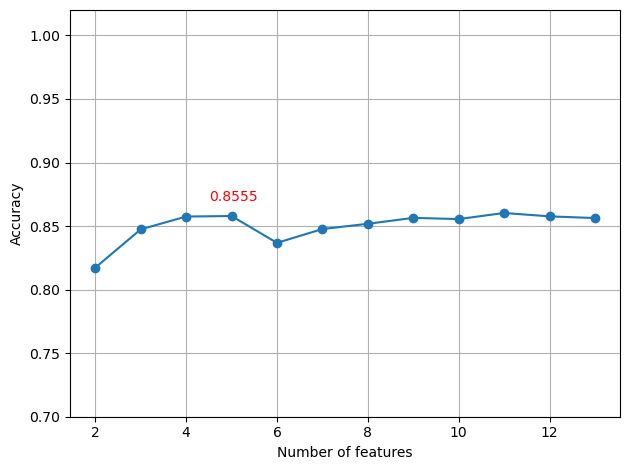

In [19]:
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.annotate(0.8555,(4.5,0.87),color ="red")
plt.grid()
plt.tight_layout()
plt.savefig('SBS_featureselect.png')
plt.show()

In [20]:
k5 = list(sbs.subsets_[8])
print(df1.columns[0:13][k5])

Index(['education', 'occupation', 'relationship', 'capital-gain',
       'capital-loss'],
      dtype='object')


In [21]:
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,5.0,77516,13,13,0,8.0,4,0,1,2174,0,40,0.0,0
1,50,1.0,83311,13,13,6,4.0,1,0,1,0,0,13,0.0,0
2,38,0.0,215646,8,9,2,6.0,4,0,1,0,0,40,0.0,0
3,53,0.0,234721,6,7,6,6.0,1,4,1,0,0,40,0.0,0
4,28,0.0,338409,13,13,6,5.0,0,4,0,0,0,40,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.0,257302,11,12,6,0.0,0,0,0,0,0,38,0.0,0
32557,40,0.0,154374,8,9,6,7.0,1,0,1,0,0,40,0.0,1
32558,58,0.0,151910,8,9,3,8.0,5,0,0,0,0,40,0.0,0
32559,22,0.0,201490,8,9,0,8.0,2,0,1,0,0,20,0.0,0


In [22]:
X_newtrain=df1.iloc[:,[4,7,8,10,11]].values
y_newtrain=df1.iloc[:,14].values

X_newtest=df_test.iloc[:,[4,7,8,10,11]].values
y_newtest=df_test.iloc[:,14].values


#### Use Random Forest

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

sc=StandardScaler()
X_newtrain_std = sc.fit_transform(X_newtrain)
X_newtest_std = sc.transform(X_newtest)
print(X_newtrain_std)
print(X_newtest_std)
n_es = [0]
Sc = [0]
EN = [0]

for i in range(100):
    forest_try = RandomForestClassifier(criterion='gini',n_estimators=10+10*i, random_state=1,n_jobs=2) #n先隨便取
    forest_try.fit(X_newtrain_std, y_train)

    
    y_pred = forest_try.predict(X_newtest_std)  
    
    print('forest gini n=%d accuracy: %.3f' %(10+10*i, accuracy_score(y_newtest, y_pred)))
    print('there are %d numbers of error ' % (y_newtest != y_pred).sum(),'\n')
    
    n_es = np.append(n_es,10+10*i)
    Sc = np.append(Sc, accuracy_score(y_newtest, y_pred))
    EN = np.append(EN, (y_newtest != y_pred).sum())

    
n_es = n_es[1:]
Xtick = np.arange(len(n_es))
Sc = Sc[1:]
EN = EN[1:]

RF_5SC = Sc
RF_5EN = EN 

[[ 1.12876108  1.04369026 -0.36985971  0.14578729 -0.21858434]
 [ 1.12876108 -0.85902036 -0.36985971 -0.14754962 -0.21858434]
 [-0.44063796  1.04369026 -0.36985971 -0.14754962 -0.21858434]
 ...
 [-0.44063796  1.67792714 -0.36985971 -0.14754962 -0.21858434]
 [-0.44063796 -0.22478349 -0.36985971 -0.14754962 -0.21858434]
 [-0.44063796 -1.49325724 -0.36985971  1.8796324  -0.21858434]]
[[-1.22533748 -0.22478349  2.98991544 -0.14754962 -0.21858434]
 [-0.44063796 -0.85902036 -0.36985971 -0.14754962 -0.21858434]
 [ 0.73641132 -0.85902036 -0.36985971 -0.14754962 -0.21858434]
 ...
 [ 1.12876108 -0.85902036 -0.36985971 -0.14754962 -0.21858434]
 [ 1.12876108 -0.22478349  0.47008408  0.58849124 -0.21858434]
 [ 1.12876108 -0.85902036 -0.36985971 -0.14754962 -0.21858434]]
forest gini n=10 accuracy: 0.854
there are 2194 numbers of error  

forest gini n=20 accuracy: 0.854
there are 2193 numbers of error  

forest gini n=30 accuracy: 0.855
there are 2187 numbers of error  

forest gini n=40 accuracy: 0

KeyboardInterrupt: 

0.8545200558770705


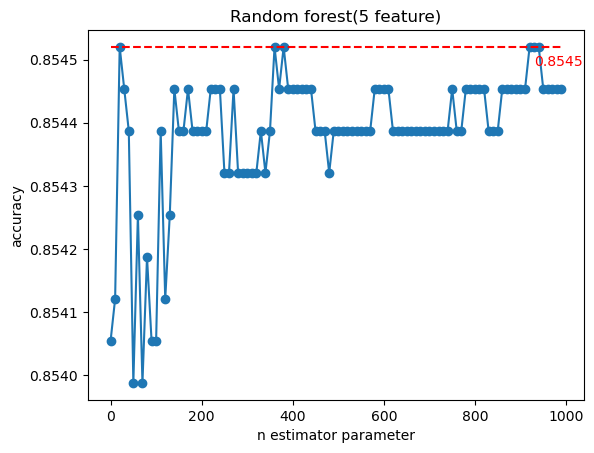

2187


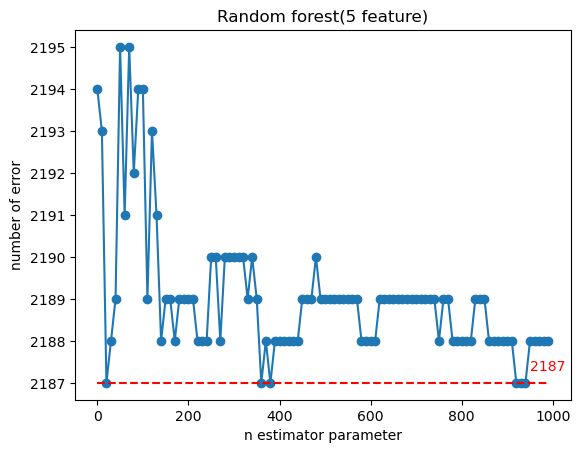

In [186]:
print(max(RF_5SC))
M = max(RF_5SC)*np.ones(len(RF_5SC))
plt.plot(Xtick*10,RF_5SC,'o-')
plt.plot(Xtick*10,M,'--',color = 'red')
#plt.xticks(Xtick, n_es, rotation='vertical')
plt.annotate(0.8545,(930,0.85449),color='red')
plt.xlabel('n estimator parameter')
plt.ylabel('accuracy')
plt.title('Random forest(5 feature)')
plt.savefig('RF_score_5.png')
plt.show()

print(min(RF_5EN))
m = min(RF_5EN)*np.ones(len(RF_5EN))
plt.plot(Xtick*10,RF_5EN,'o-')
plt.plot(Xtick*10,m,'--',color = 'red')
#plt.xticks(Xtick, n_es, rotation='vertical')
plt.annotate(2187,(950,2187.3),color='red')
plt.xlabel('n estimator parameter')
plt.ylabel('number of error')
plt.title('Random forest(5 feature)')
plt.savefig('RF_EN_5.png')
plt.show()

In [265]:
df = np.vstack((RF_5SC,RF_5EN))
RF_5df = pd.DataFrame(df,columns=n_es,index=['Score',"# of error"])
RF_5df.add_prefix('n=')

,n=10,n=20,n=30,n=40,n=50,n=60,n=70,n=80,n=90,n=100,...,n=910,n=920,n=930,n=940,n=950,n=960,n=970,n=980,n=990,n=1000
Score,0.854054,0.854121,0.85452,0.854454,0.854387,0.853988,0.854254,0.853988,0.854187,0.854054,...,0.854454,0.854454,0.85452,0.85452,0.85452,0.854454,0.854454,0.854454,0.854454,0.854454
# of error,2194.000000,2193.000000,2187.00000,2188.000000,2189.000000,2195.000000,2191.000000,2195.000000,2192.000000,2194.000000,...,2188.000000,2188.000000,2187.00000,2187.00000,2187.00000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000


#### Use Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

lr = LogisticRegression(C=1, random_state=1, solver='lbfgs', multi_class='ovr') 
lr.fit(X_newtrain_std, y_newtrain)


print('Training accuracy:', lr.score(X_newtrain_std, y_newtrain))
print('Test accuracy:', lr.score(X_newtest_std, y_newtest))

y_pred = lr.predict(X_newtest_std) 
print('there are %d error in testing data' % (y_newtest != y_pred).sum())

Training accuracy: 0.8383466135458167
Test accuracy: 0.8384886582851061
there are 2428 error in testing data


Training accuracy: 0.750863213811421
Test accuracy: 0.7542074103638662
there are 3695 numbers of error  

Training accuracy: 0.7623837981407703
Test accuracy: 0.7645845805893701
there are 3539 numbers of error  

Training accuracy: 0.8119853917662683
Test accuracy: 0.8146078627020554
there are 2787 numbers of error  

Training accuracy: 0.8393758300132802
Test accuracy: 0.8386882192509811
there are 2425 numbers of error  

Training accuracy: 0.8387782204515273
Test accuracy: 0.8390873411827313
there are 2419 numbers of error  

Training accuracy: 0.8383466135458167
Test accuracy: 0.8384886582851061
there are 2428 numbers of error  

Training accuracy: 0.8383466135458167
Test accuracy: 0.8384886582851061
there are 2428 numbers of error  

Training accuracy: 0.8383466135458167
Test accuracy: 0.8384886582851061
there are 2428 numbers of error  

Training accuracy: 0.8383466135458167
Test accuracy: 0.8384886582851061
there are 2428 numbers of error  

Training accuracy: 0.8383466135458167


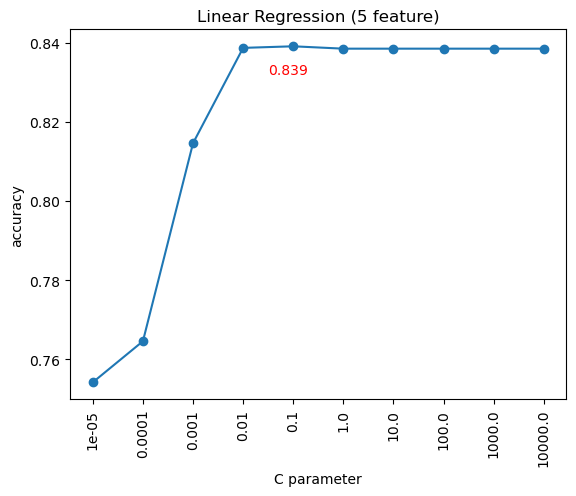

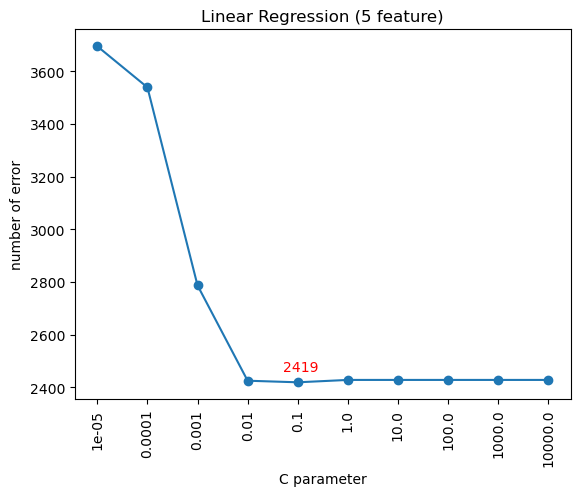

In [266]:
C = [0]
Sc = [0]
EN = [0]


for i in range(-5,5):
    lr = LogisticRegression(C=1*((10)**i), random_state=1, solver='lbfgs', multi_class='ovr') 
    lr.fit(X_newtrain_std, y_newtrain)

   
    print('Training accuracy:', lr.score(X_newtrain_std, y_newtrain))
    print('Test accuracy:', lr.score(X_newtest_std, y_newtest))

    y_pred = lr.predict(X_newtest_std) 
    print('there are %d numbers of error ' % (y_newtest != y_pred).sum(),'\n')
    
    errN = (y_newtest != y_pred).sum()
    
    C = np.append(C,1*((10)**i))
    Sc = np.append(Sc,lr.score(X_newtest_std, y_newtest))
    EN = np.append(EN, errN)
    
C = C[1:]
Xtick = np.arange(len(C))
Sc = Sc[1:]
EN = EN[1:]

plt.plot(Xtick,Sc,'o-')
plt.xticks(Xtick, C, rotation='vertical')
plt.annotate(0.839,(3.5,0.832),color='red')
plt.xlabel('C parameter')
plt.ylabel('accuracy')
plt.title('Linear Regression (5 feature)')
plt.savefig('LR_score_5.png')
plt.show()

plt.plot(Xtick,EN,'o-')
plt.xticks(Xtick, C, rotation='vertical')
plt.annotate(2419,(3.7,2460),color='red')
plt.xlabel('C parameter')
plt.ylabel('number of error')
plt.title('Linear Regression (5 feature)')
plt.savefig('LR_EN_5.png')
plt.show()

In [267]:
df = np.vstack((Sc,EN))
#print(df)
LR_alldf = pd.DataFrame(df,columns=['0.00001','0.0001','0.001','0.01','0.1','1','10','100','1000','10000'],index=['Score',"# of error"])
LR_alldf.add_prefix('C=')

,C=0.00001,C=0.0001,C=0.001,C=0.01,C=0.1,C=1,C=10,C=100,C=1000,C=10000
Score,0.754207,0.764585,0.814608,0.838688,0.839087,0.838489,0.838489,0.838489,0.838489,0.838489
# of error,3695.000000,3539.000000,2787.000000,2425.000000,2419.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000


#### Use kernal SVM

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


svm_rbf = SVC(kernel='rbf', C=10.0, random_state=1,gamma=0.1) #c & gamma的值先隨便給
svm_rbf.fit(X_newtrain_std, y_newtrain)

print('Training accuracy of svm:', svm_rbf.score(X_newtrain_std, y_newtrain))
print('Test accuracy of svm :', svm_rbf.score(X_newtest_std, y_newtest))

y_pred = svm_rbf.predict(X_newtest_std) 
print('there are %d error in testing data' % (y_newtest != y_pred).sum())

Training accuracy of svm: 0.8440239043824701
Test accuracy of svm : 0.8426794385684827
there are 2365 error in testing data


In [203]:
n = 6
C = np.zeros((n,n))
G = np.zeros((n,n))
Sc = np.zeros((n,n))
EN = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        
        #開始training
        svm_rbf = SVC(kernel='rbf', C=0.001*(10**i), random_state=1,gamma=0.001*(10**j)) 
        svm_rbf.fit(X_newtrain_std, y_newtrain)

        
        print('Training accuracy of svm c=%f,gamma=%f: %.3f' %(0.001*(10**i),0.001*(10**j),svm_rbf.score(X_newtrain_std, y_newtrain)))
        print('Test accuracy of svm c=%f,gamma=%f: %.3f' %(0.001*(10**i),0.001*(10**j),svm_rbf.score(X_newtest_std, y_newtest)))

        y_pred = svm_rbf.predict(X_newtest_std) #用test data套入model的值
        
        print('there are %d error in testing data' % (y_newtest != y_pred).sum())
        
        C[i,j] = 0.001*(10**i)
        G[i,j] = 0.001*(10**j)
        Sc[i,j] = svm_rbf.score(X_newtest_std, y_newtest)
        EN[i,j] = (y_newtest != y_pred).sum()

SVM_SC5 = Sc
SVM_EN5 = EN

Training accuracy of svm c=0.001000,gamma=0.001000: 0.751
Test accuracy of svm c=0.001000,gamma=0.001000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=0.010000: 0.751
Test accuracy of svm c=0.001000,gamma=0.010000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=0.100000: 0.751
Test accuracy of svm c=0.001000,gamma=0.100000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=1.000000: 0.751
Test accuracy of svm c=0.001000,gamma=1.000000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=10.000000: 0.751
Test accuracy of svm c=0.001000,gamma=10.000000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.001000,gamma=100.000000: 0.751
Test accuracy of svm c=0.001000,gamma=100.000000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.010000,gamma=0.001000: 0.751
Test accuracy of svm c=0.010000,gamma=0.001000: 0.754
有3695個 testing data出問題
Training accuracy of svm c=0.010000,gamma=0.01000

[[1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03]
 [1.e-02 1.e-02 1.e-02 1.e-02 1.e-02 1.e-02]
 [1.e-01 1.e-01 1.e-01 1.e-01 1.e-01 1.e-01]
 [1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00]
 [1.e+01 1.e+01 1.e+01 1.e+01 1.e+01 1.e+01]
 [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]]
[[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]]


/var/folders/3n/ftvyv_w15vb7271s7vtyqpfh0000gq/T/ipykernel_24138/92078512.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,0.001,0.01,0.1,1,10,100])
/var/folders/3n/ftvyv_w15vb7271s7vtyqpfh0000gq/T/ipykernel_24138/92078512.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0.001,0.01,0.1,1,10,100])


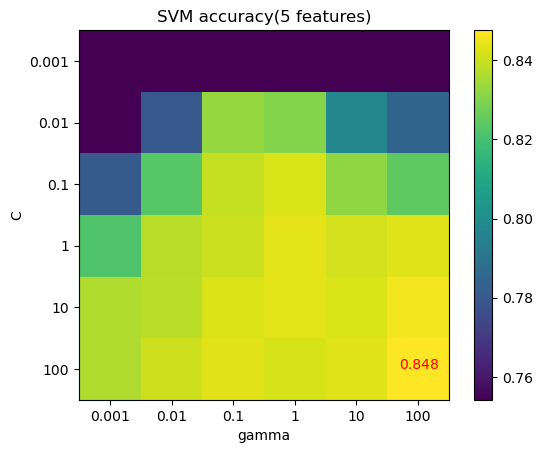

/var/folders/3n/ftvyv_w15vb7271s7vtyqpfh0000gq/T/ipykernel_24138/92078512.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,0.001,0.01,0.1,1,10,100])
/var/folders/3n/ftvyv_w15vb7271s7vtyqpfh0000gq/T/ipykernel_24138/92078512.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,0.001,0.01,0.1,1,10,100])


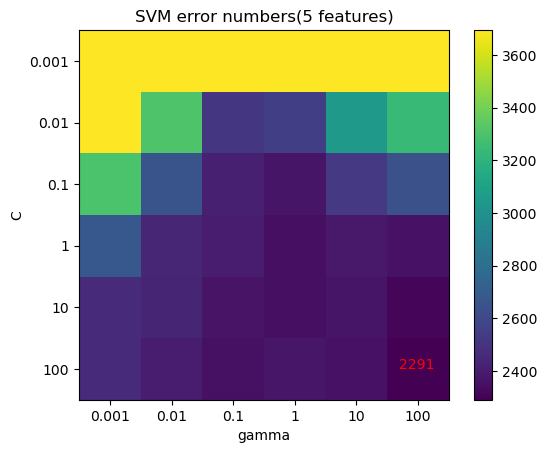

In [207]:
print(C)
print(G)
fig, ax = plt.subplots(1,1)
scplot = ax.imshow(SVM_SC5)
ax.set_xticklabels([0,0.001,0.01,0.1,1,10,100])
ax.set_yticklabels([0,0.001,0.01,0.1,1,10,100])
ax.text(4.7,5,0.848,color ="red")
ax.set_title('SVM accuracy(5 features)')
ax.set_xlabel('gamma')
ax.set_ylabel('C')
plt.colorbar(scplot)
plt.savefig('SVM_SC_5.png')
plt.show()

fig, ax = plt.subplots(1,1)
scplot = ax.imshow(SVM_EN5)
ax.set_xticklabels([0,0.001,0.01,0.1,1,10,100])
ax.set_yticklabels([0,0.001,0.01,0.1,1,10,100])
ax.text(4.7,5,2291,color ="red")
ax.set_title('SVM error numbers(5 features)')
ax.set_xlabel('gamma')
ax.set_ylabel('C')
plt.colorbar(scplot)
plt.savefig('SVM_EN_5.png')
plt.show()

In [268]:
SVM5scdf = pd.DataFrame(SVM_SC5,columns=['0.001','0.01','0.1','1','10','100'],index=['c=0.001','c=0.01','c=0.1','c=1','c=10','c=100'])
SVM5scdf.add_prefix('g = ')

,g = 0.001,g = 0.01,g = 0.1,g = 1,g = 10,g = 100
c=0.001,0.754207,0.754207,0.754207,0.754207,0.754207,0.754207
c=0.01,0.754207,0.780084,0.832901,0.830174,0.797379,0.784208
c=0.1,0.780749,0.823189,0.839287,0.842413,0.831970,0.824320
c=1,0.822058,0.837557,0.840285,0.843810,0.841349,0.843145
c=10,0.836427,0.838090,0.842679,0.843677,0.842214,0.846005
c=100,0.836560,0.840351,0.843478,0.841815,0.842879,0.847602


In [269]:
SVM5endf = pd.DataFrame(SVM_EN5,columns=['0.001','0.01','0.1','1','10','100'],index=['c=0.001','c=0.01','c=0.1','c=1','c=10','c=100'])
SVM5endf.add_prefix('g = ')

,g = 0.001,g = 0.01,g = 0.1,g = 1,g = 10,g = 100
c=0.001,3695.0,3695.0,3695.0,3695.0,3695.0,3695.0
c=0.01,3695.0,3306.0,2512.0,2553.0,3046.0,3244.0
c=0.1,3296.0,2658.0,2416.0,2369.0,2526.0,2641.0
c=1,2675.0,2442.0,2401.0,2348.0,2385.0,2358.0
c=10,2459.0,2434.0,2365.0,2350.0,2372.0,2315.0
c=100,2457.0,2400.0,2353.0,2378.0,2362.0,2291.0


#### Use Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree_model_1 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
tree_model_1.fit(X_newtrain_std, y_newtrain)
tree_model_2.fit(X_newtrain_std, y_newtrain)

#做完model，看看成效如何
#測試準確度
y_pred_1 = tree_model_1.predict(X_newtest_std) #用test data套入model的值
y_pred_2 = tree_model_2.predict(X_newtest_std)

print('tree gini accuracy: %.3f' % accuracy_score(y_newtest, y_pred_1))
print('there are %d error in testing data' % (y_newtest != y_pred_1).sum(),'\n')

print('tree entropy accuracy: %.3f' % accuracy_score(y_newtest, y_pred_2))
print('there are %d error in testing data' % (y_newtest != y_pred_2).sum(),'\n')

tree gini accuracy: 0.839
there are 2423 error in testing data 

tree entropy accuracy: 0.839
there are 2422 error in testing data 



In [213]:
Sc = np.zeros(10)
EN = np.zeros(10)
D = np.zeros(10)

for i in range (10):
    tree_model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=1+3*i, random_state=1)
    tree_model_2.fit(X_newtrain_std, y_newtrain)

    #做完model，看看成效如何
    #測試準確度
    y_pred_2 = tree_model_2.predict(X_newtest_std)

    print('tree entropy accuracy in depth = %d: %.3f' % (1+3*i, accuracy_score(y_newtest, y_pred_2)))
    print('there are %d error classification of testing data' % (y_newtest != y_pred_2).sum(),'\n')
    
    D[i] = 1+3*i
    Sc[i] = accuracy_score(y_newtest, y_pred_2)
    EN[i] = (y_newtest != y_pred_2).sum()

DT_SC = Sc
DT_EN = EN

tree entropy accuracy in depth = 1: 0.754
there are 3695 error classification of testing data 

tree entropy accuracy in depth = 4: 0.839
there are 2422 error classification of testing data 

tree entropy accuracy in depth = 7: 0.849
there are 2265 error classification of testing data 

tree entropy accuracy in depth = 10: 0.853
there are 2216 error classification of testing data 

tree entropy accuracy in depth = 13: 0.854
there are 2188 error classification of testing data 

tree entropy accuracy in depth = 16: 0.855
there are 2182 error classification of testing data 

tree entropy accuracy in depth = 19: 0.854
there are 2191 error classification of testing data 

tree entropy accuracy in depth = 22: 0.854
there are 2190 error classification of testing data 

tree entropy accuracy in depth = 25: 0.854
there are 2190 error classification of testing data 

tree entropy accuracy in depth = 28: 0.854
there are 2190 error classification of testing data 



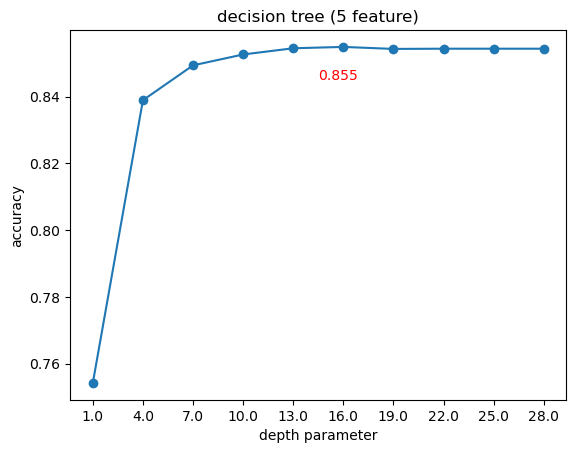

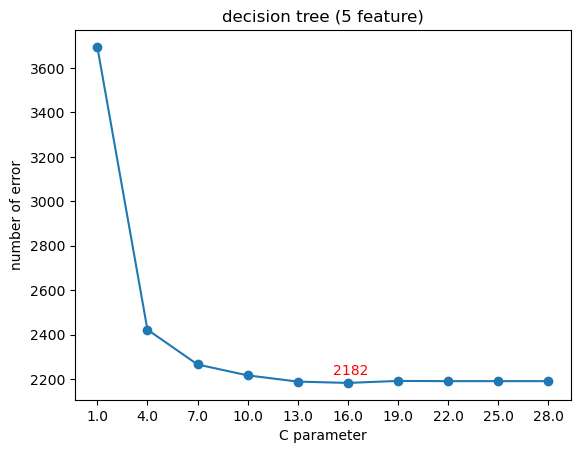

In [219]:
Xtick = np.arange(len(D))

plt.plot(Xtick,DT_SC,'o-')
plt.xticks(Xtick, D, rotation='horizontal')
plt.annotate(0.855,(4.5,0.845),color='red')
plt.xlabel('depth parameter')
plt.ylabel('accuracy')
plt.title('decision tree (5 feature)')
plt.savefig('DT_score_5.png')
plt.show()

plt.plot(Xtick,DT_EN,'o-')
plt.xticks(Xtick, D, rotation='horizontal')
plt.annotate(2182,(4.7,2220),color='red')
plt.xlabel('C parameter')
plt.ylabel('number of error')
plt.title('decision tree (5 feature)')
plt.savefig('DT_EN_5.png')
plt.show()

In [270]:
df = np.vstack((DT_SC,DT_EN))
#print(df)
dt_5df = pd.DataFrame(df,columns=D,index=['Score',"# of error"])
dt_5df.add_prefix('depth=')

,depth=1.0,depth=4.0,depth=7.0,depth=10.0,depth=13.0,depth=16.0,depth=19.0,depth=22.0,depth=25.0,depth=28.0
Score,0.754207,0.838888,0.849331,0.852591,0.854454,0.854853,0.854254,0.85432,0.85432,0.85432
# of error,3695.000000,2422.000000,2265.000000,2216.000000,2188.000000,2182.000000,2191.000000,2190.00000,2190.00000,2190.00000


#### Majority Voting Principle

In [220]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import operator
#from sklearn.externals import six

class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier
    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble
    vote : str, {'classlabel', 'probability'} (default='classlabel')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).
    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.
    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.
        y : array-like, shape = [n_examples]
            Vector of target class labels.
        Returns
        -------
        self : object
        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.
        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_features is the number of features.
        Returns
        ----------
        avg_proba : array-like, shape = [n_examples, n_classes]
            Weighted average probability for each class per example.
        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out


In [221]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(penalty='l2', 
                          C=0.1,
                          solver='lbfgs',
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=16,
                              criterion='entropy',
                              random_state=0)

clf3 = forest = RandomForestClassifier(criterion='gini',n_estimators=30, random_state=1,n_jobs=2)

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'Random Forest']

print('5-fold cross validation:\n')
    
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])

clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_newtrain,
                             y=y_newtrain,
                             cv=5,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

ROC AUC: 0.86 (+/- 0.00) [Logistic regression]
ROC AUC: 0.90 (+/- 0.00) [Decision tree]
ROC AUC: 0.90 (+/- 0.00) [Random Forest]
ROC AUC: 0.90 (+/- 0.00) [Majority voting]


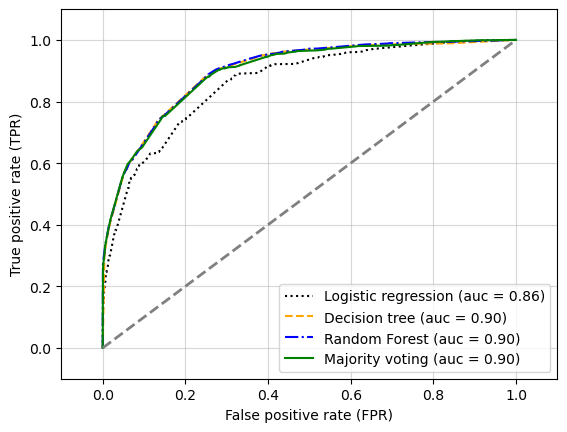

In [222]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls         in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_newtrain,
                     y_newtrain).predict_proba(X_newtest)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_newtest,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('images/07_04', dpi=300)
plt.show()

In [272]:
column = ['Linear regression','Random forest','SVM']
All_class_score = [0.838,0.851,0.845]
five_class_score = [0.839,0.854,0.848]

df = np.vstack((All_class_score,five_class_score))
#print(df)
final_df = pd.DataFrame(df,columns=column,index=['all features',"five features"])
final_df

,Linear regression,Random forest,SVM
all features,0.838,0.851,0.845
five features,0.839,0.854,0.848
